In [433]:
import pandas as pd
online = "/Users/wwwzhang/Documents/FIN3210/Week3 Assignment/FIN3210 Week 3 Online sales.xlsx"
all = "/Users/wwwzhang/Documents/FIN3210/Week3 Assignment/FS_Comins.csv"
df_on = pd.read_excel(online)
df_all = pd.read_csv(all)

In [434]:
df_all = df_all[df_all['Typrep'] == 'A']
df_all.rename(columns={'Accper': 'date','B001100000':'total_sales_c','ShortName_EN':'company'}, inplace=True)
df_all

,Stkcd,company,date,Typrep,total_sales_c
1,2511,ZSJR,2016/1/1,A,2.958977e+09
3,2511,ZSJR,2016/3/31,A,8.540908e+08
5,2511,ZSJR,2016/6/30,A,1.771553e+09
7,2511,ZSJR,2016/9/30,A,2.740959e+09
9,2511,ZSJR,2016/12/31,A,3.809349e+09
...,...,...,...,...,...
317,603899,CGWJ,2019/9/30,A,7.947344e+09
318,603899,CGWJ,2019/12/31,A,1.114110e+10
321,603899,CGWJ,2020/1/1,A,1.114110e+10
323,603899,CGWJ,2020/3/31,A,2.083587e+09


In [435]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['quarter'] = df_all['date'].dt.to_period('Q')
df_all

,Stkcd,company,date,Typrep,total_sales_c,quarter
1,2511,ZSJR,2016-01-01,A,2.958977e+09,2016Q1
3,2511,ZSJR,2016-03-31,A,8.540908e+08,2016Q1
5,2511,ZSJR,2016-06-30,A,1.771553e+09,2016Q2
7,2511,ZSJR,2016-09-30,A,2.740959e+09,2016Q3
9,2511,ZSJR,2016-12-31,A,3.809349e+09,2016Q4
...,...,...,...,...,...,...
317,603899,CGWJ,2019-09-30,A,7.947344e+09,2019Q3
318,603899,CGWJ,2019-12-31,A,1.114110e+10,2019Q4
321,603899,CGWJ,2020-01-01,A,1.114110e+10,2020Q1
323,603899,CGWJ,2020-03-31,A,2.083587e+09,2020Q1


In [436]:
df_all['date'] = pd.to_datetime(df_all['date'], format='%Y%m%d')
df_all = df_all[~((df_all['date'].dt.month == 1) & (df_all['date'].dt.day == 1))]
df_all

,Stkcd,company,date,Typrep,total_sales_c,quarter
3,2511,ZSJR,2016-03-31,A,8.540908e+08,2016Q1
5,2511,ZSJR,2016-06-30,A,1.771553e+09,2016Q2
7,2511,ZSJR,2016-09-30,A,2.740959e+09,2016Q3
9,2511,ZSJR,2016-12-31,A,3.809349e+09,2016Q4
13,2511,ZSJR,2017-03-31,A,1.032247e+09,2017Q1
...,...,...,...,...,...,...
314,603899,CGWJ,2019-06-30,A,4.838623e+09,2019Q2
317,603899,CGWJ,2019-09-30,A,7.947344e+09,2019Q3
318,603899,CGWJ,2019-12-31,A,1.114110e+10,2019Q4
323,603899,CGWJ,2020-03-31,A,2.083587e+09,2020Q1


In [437]:
df_all['quarter_str'] = df_all['quarter'].astype(str)
df_all['total_sales_last'] = df_all.groupby('Stkcd')['total_sales_c'].shift(1)
df_all['total_sales'] =  df_all['total_sales_c'] - df_all['total_sales_last']
df_all.loc[df_all['quarter_str'].str.endswith('Q1'), 'total_sales'] = df_all['total_sales_c']
df_all

/var/folders/t9/_xbryg8n2pl5dm3phvjw6s740000gn/T/ipykernel_10954/1842492549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['quarter_str'] = df_all['quarter'].astype(str)
/var/folders/t9/_xbryg8n2pl5dm3phvjw6s740000gn/T/ipykernel_10954/1842492549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['total_sales_last'] = df_all.groupby('Stkcd')['total_sales_c'].shift(1)
/var/folders/t9/_xbryg8n2pl5dm3phvjw6s740000gn/T/ipykernel_10954/1842492549.py:3: SettingWithCopyWarning: 
A value is tryin

,Stkcd,company,date,Typrep,total_sales_c,quarter,quarter_str,total_sales_last,total_sales
3,2511,ZSJR,2016-03-31,A,8.540908e+08,2016Q1,2016Q1,NaN,8.540908e+08
5,2511,ZSJR,2016-06-30,A,1.771553e+09,2016Q2,2016Q2,8.540908e+08,9.174619e+08
7,2511,ZSJR,2016-09-30,A,2.740959e+09,2016Q3,2016Q3,1.771553e+09,9.694064e+08
9,2511,ZSJR,2016-12-31,A,3.809349e+09,2016Q4,2016Q4,2.740959e+09,1.068390e+09
13,2511,ZSJR,2017-03-31,A,1.032247e+09,2017Q1,2017Q1,3.809349e+09,1.032247e+09
...,...,...,...,...,...,...,...,...,...
314,603899,CGWJ,2019-06-30,A,4.838623e+09,2019Q2,2019Q2,2.355614e+09,2.483009e+09
317,603899,CGWJ,2019-09-30,A,7.947344e+09,2019Q3,2019Q3,4.838623e+09,3.108721e+09
318,603899,CGWJ,2019-12-31,A,1.114110e+10,2019Q4,2019Q4,7.947344e+09,3.193757e+09
323,603899,CGWJ,2020-03-31,A,2.083587e+09,2020Q1,2020Q1,1.114110e+10,2.083587e+09


In [438]:
df_on = df_on.drop(0,axis=0)
new_column_names = ['date', 'CGWJ', 'XXDQ', 'ZJGX','ZSJR','HSH','LPPZ','QQSP','SZSS','TLMB','XMSP'] 
df_on.columns = new_column_names
df_on

,date,CGWJ,XXDQ,ZJGX,ZSJR,HSH,LPPZ,QQSP,SZSS,TLMB,XMSP
1,2016-01-01 00:00:00,3888967.8,46512908.49,289734.74,11471065,1026754.11,65009434.76,14621424.0,145185004.999996,NaN,4895641.68
2,2016-02-01 00:00:00,3983190.45,30841997.66,152692.14,7999038.67,838209.68,18305288.42,3167168.94,23786328.2,NaN,1011038.61
3,2016-03-01 00:00:00,6395686.99,42167714.59,228973.45,14377928.6,536719.74,13782278.59,4041073.85,24688109.3,NaN,1778428.59
4,2016-04-01 00:00:00,4968614.43,32795375.19,207874.8,7701460.19,405520.3,12376698.7,4993164.26,25036368.92,NaN,1305881.85
5,2016-05-01 00:00:00,6566980.86,31152589.87,220956.36,13586298.04,580470.85,20214060.63,4658511.88,40733925.26,NaN,1453825.67
6,2016-06-01 00:00:00,8569214.02,37344969.62,282178.17,22960052.47,601939.53,25060619.79,7785063.37,58033904.08,NaN,3702526.81
7,2016-07-01 00:00:00,7131432.67,29719579.16,146074.31,14576451.88,485289.67,18539008.24,4788736.43,48874142.26,NaN,1475463.6
8,2016-08-01 00:00:00,9430772.28,31142466.69,123150.87,14907551.27,330136.28,33340635.83,5281617.31,52133732.27,NaN,1149121.86
9,2016-09-01 00:00:00,11088238.05,34881694.01,170409.93,9727400.35,434545.47,31547317.82,5563860.99,110667506.89,NaN,2254384.51
10,2016-10-01 00:00:00,12570332,44820596.5,191198.6,7039961.22,589759.42,27007934.73,6766032.3,81430547.150001,NaN,2008006.64


In [439]:
unpivoted_df = pd.melt(df_on, id_vars=['date'], var_name='company', value_name='online_sales')
unpivoted_df

,date,company,online_sales
0,2016-01-01,CGWJ,3888967.8
1,2016-02-01,CGWJ,3983190.45
2,2016-03-01,CGWJ,6395686.99
3,2016-04-01,CGWJ,4968614.43
4,2016-05-01,CGWJ,6566980.86
...,...,...,...
545,2020-03-01,XMSP,8621983.82
546,2020-04-01,XMSP,8476046.53
547,2020-05-01,XMSP,8540964.7
548,2020-06-01,XMSP,11706599.62


In [440]:
unpivoted_df['date'] = pd.to_datetime(unpivoted_df['date'])
unpivoted_df['quarter'] = unpivoted_df['date'].dt.to_period('Q')
unpivoted_df.dropna(inplace=True)
unpivoted_df

,date,company,online_sales,quarter
0,2016-01-01,CGWJ,3888967.8,2016Q1
1,2016-02-01,CGWJ,3983190.45,2016Q1
2,2016-03-01,CGWJ,6395686.99,2016Q1
3,2016-04-01,CGWJ,4968614.43,2016Q2
4,2016-05-01,CGWJ,6566980.86,2016Q2
...,...,...,...,...
545,2020-03-01,XMSP,8621983.82,2020Q1
546,2020-04-01,XMSP,8476046.53,2020Q2
547,2020-05-01,XMSP,8540964.7,2020Q2
548,2020-06-01,XMSP,11706599.62,2020Q2


In [441]:
df = pd.merge(df_all[['company','quarter','total_sales']], unpivoted_df, on=['quarter','company'], how='right')
df.dropna(inplace=True)

In [442]:
df[df['total_sales'].isna()] 

,company,quarter,total_sales,date,online_sales


In [443]:
df_on = df[['quarter','online_sales']]
df_on['whole_online'] = df_on.groupby('quarter')['online_sales'].transform('sum')
df_on

/var/folders/t9/_xbryg8n2pl5dm3phvjw6s740000gn/T/ipykernel_10954/3414529135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_on['whole_online'] = df_on.groupby('quarter')['online_sales'].transform('sum')


,quarter,online_sales,whole_online
0,2016Q1,3888967.8,73018628.16
1,2016Q1,3983190.45,73018628.16
2,2016Q1,6395686.99,73018628.16
3,2016Q2,4968614.43,84088299.53
4,2016Q2,6566980.86,84088299.53
...,...,...,...
530,2020Q1,6999141.89,3760881900.840004
531,2020Q1,8621983.82,3760881900.840004
532,2020Q2,8476046.53,2927264633.16998
533,2020Q2,8540964.7,2927264633.16998


In [444]:
df_t = df[['quarter','total_sales']]
df_t['whole_sale'] = df_t.groupby('quarter')['total_sales'].transform('sum')
df_t

/var/folders/t9/_xbryg8n2pl5dm3phvjw6s740000gn/T/ipykernel_10954/831686392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['whole_sale'] = df_t.groupby('quarter')['total_sales'].transform('sum')


,quarter,total_sales,whole_sale
0,2016Q1,1.133433e+09,1.166894e+10
1,2016Q1,1.133433e+09,1.166894e+10
2,2016Q1,1.133433e+09,1.166894e+10
3,2016Q2,1.046118e+09,1.161064e+10
4,2016Q2,1.046118e+09,1.161064e+10
...,...,...,...
530,2020Q1,1.895828e+08,4.250578e+10
531,2020Q1,1.895828e+08,4.250578e+10
532,2020Q2,2.462300e+08,4.253098e+10
533,2020Q2,2.462300e+08,4.253098e+10


In [445]:
df = pd.merge(df_t, df_on, on='quarter', how='left')
df.drop_duplicates(subset='quarter', keep='first', inplace=True)
df.dropna()

,quarter,total_sales,whole_sale,online_sales,whole_online
0,2016Q1,1.133433e+09,1.166894e+10,3888967.8,73018628.16
45,2016Q2,1.046118e+09,1.161064e+10,4968614.43,84088299.53
90,2016Q3,1.272799e+09,1.263622e+10,7131432.67,84185667.76
135,2016Q4,1.210115e+09,1.316611e+10,12570332,112558707.77
180,2017Q1,1.412887e+09,1.448531e+10,8951076.86,119572167.07
228,2017Q2,1.372521e+09,1.653319e+10,10546912.27,142465704.81
282,2017Q3,1.707592e+09,1.885702e+10,11322075.08,140505310.26
336,2017Q4,1.864103e+09,1.977931e+10,15683187.11,226126584.819999
390,2018Q1,1.840310e+09,1.994805e+10,17147911.26,225949768.209999
444,2018Q2,1.946322e+09,2.091364e+10,15952053.34,227468518.55


In [446]:
df['percentage'] = df['whole_online']/df['whole_sale']
df['percentage'] = df['percentage']*100
df

,quarter,total_sales,whole_sale,online_sales,whole_online,percentage
0,2016Q1,1.133433e+09,1.166894e+10,3888967.8,73018628.16,0.625752
45,2016Q2,1.046118e+09,1.161064e+10,4968614.43,84088299.53,0.724235
90,2016Q3,1.272799e+09,1.263622e+10,7131432.67,84185667.76,0.666225
135,2016Q4,1.210115e+09,1.316611e+10,12570332,112558707.77,0.854912
180,2017Q1,1.412887e+09,1.448531e+10,8951076.86,119572167.07,0.825472
228,2017Q2,1.372521e+09,1.653319e+10,10546912.27,142465704.81,0.861695
282,2017Q3,1.707592e+09,1.885702e+10,11322075.08,140505310.26,0.745109
336,2017Q4,1.864103e+09,1.977931e+10,15683187.11,226126584.819999,1.143248
390,2018Q1,1.840310e+09,1.994805e+10,17147911.26,225949768.209999,1.132691
444,2018Q2,1.946322e+09,2.091364e+10,15952053.34,227468518.55,1.087656


In [447]:
df['quarter'] = df['quarter'].dt.to_timestamp()
df.set_index('quarter',inplace=True)
df.sort_index(inplace=True)
df

,total_sales,whole_sale,online_sales,whole_online,percentage
quarter,,,,,
2016-01-01,1.133433e+09,1.166894e+10,3888967.8,73018628.16,0.625752
2016-04-01,1.046118e+09,1.161064e+10,4968614.43,84088299.53,0.724235
2016-07-01,1.272799e+09,1.263622e+10,7131432.67,84185667.76,0.666225
2016-10-01,1.210115e+09,1.316611e+10,12570332,112558707.77,0.854912
2017-01-01,1.412887e+09,1.448531e+10,8951076.86,119572167.07,0.825472
2017-04-01,1.372521e+09,1.653319e+10,10546912.27,142465704.81,0.861695
2017-07-01,1.707592e+09,1.885702e+10,11322075.08,140505310.26,0.745109
2017-10-01,1.864103e+09,1.977931e+10,15683187.11,226126584.819999,1.143248
2018-01-01,1.840310e+09,1.994805e+10,17147911.26,225949768.209999,1.132691


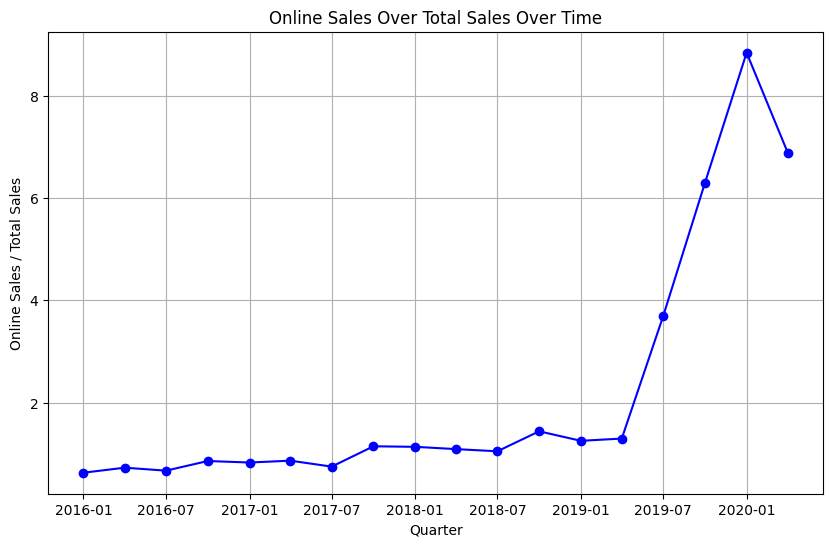

In [450]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['percentage'], marker='o', linestyle='-', color='b')
plt.title('Online Sales Over Total Sales Over Time')
plt.xlabel('Quarter')
plt.ylabel('Online Sales / Total Sales')
plt.grid(True)
plt.savefig('/Users/wwwzhang/Documents/FIN3210/Q4.png')
plt.show()
plt.close()

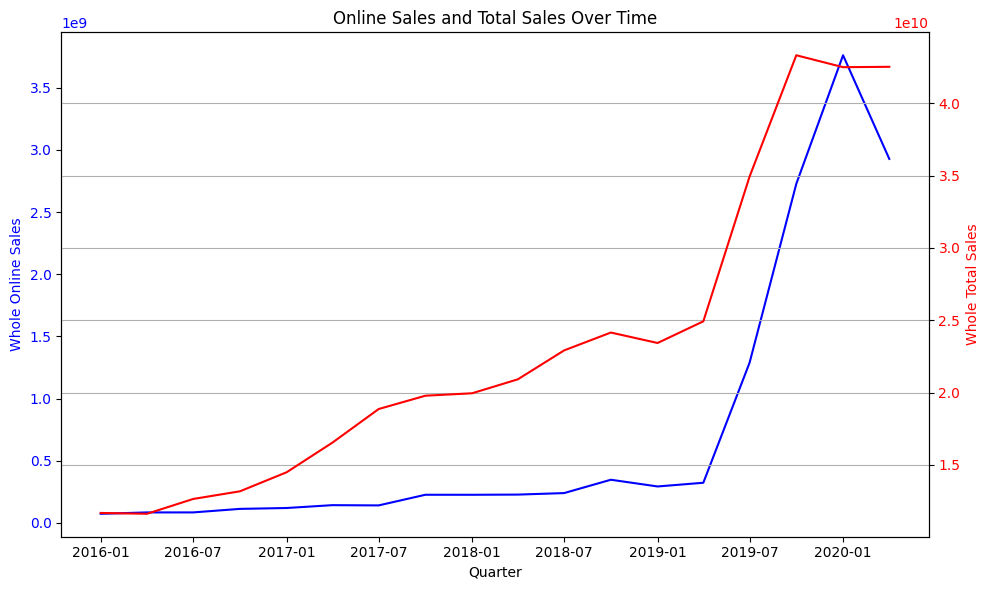

In [451]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df.index, df['whole_online'], color='b', label='Whole Online Sales')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Whole Online Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx() 
ax2.plot(df.index, df['whole_sale'], color='r', label='Whole Total Sales')
ax2.set_ylabel('Whole Total Sales', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Online Sales and Total Sales Over Time')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.savefig('/Users/wwwzhang/Documents/FIN3210/output.png')
plt.show()
plt.close()

In [419]:
df_fin = df.copy()
df_fin.reset_index(inplace=True)
df_fin['quarter'] 

0    2016-01-01
1    2016-04-01
2    2016-07-01
3    2016-10-01
4    2017-01-01
5    2017-04-01
6    2017-07-01
7    2017-10-01
8    2018-01-01
9    2018-04-01
10   2018-07-01
11   2018-10-01
12   2019-01-01
13   2019-04-01
14   2019-07-01
15   2019-10-01
16   2020-01-01
17   2020-04-01
Name: quarter, dtype: datetime64[ns]

In [416]:
unpivoted_df[unpivoted_df['quarter']=='2020Q2']

,date,company,online_sales,quarter
51,2020-04-01,CGWJ,42709008.96,2020Q2
52,2020-05-01,CGWJ,41280309.11,2020Q2
53,2020-06-01,CGWJ,49896984.16,2020Q2
106,2020-04-01,XXDQ,149583383.31,2020Q2
107,2020-05-01,XXDQ,131013914.19,2020Q2
108,2020-06-01,XXDQ,160520959.36,2020Q2
161,2020-04-01,ZJGX,4577182.53,2020Q2
162,2020-05-01,ZJGX,4723889.6,2020Q2
163,2020-06-01,ZJGX,10828615.86,2020Q2
216,2020-04-01,ZSJR,65584008.96,2020Q2
